Analyzing Hi-C Data with Straw - Colaboratory
https://colab.research.google.com/drive/1-GG-n-p9nZ7Be82UVJG7n3Q_wQ9IeuFN?usp=sharing

**Set environment**

In [70]:
10000 * 2 / 500

40.0

In [1]:
import numpy as np
import hicstraw
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import seaborn as sns

import sys
sys.path.append('..')
from config.config_sing import *
show_env()

You are in Singularity: singularity_proj_encode_fcc
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log



## Read hic file

```
hic = hicstraw.HiCFile("https://www.encodeproject.org/files/ENCFF718AWL/@@download/ENCFF718AWL.hic")
```

In [2]:
%ls -lh /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/source/hic_insitu_GM12878

total 38G
-rw-rw-r-- 1 kk319 reddylab 38G Feb  9  2019 ENCFF718AWL.hic


In [3]:
txt_fdiry = "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/source/hic_insitu_GM12878"
txt_fname = "ENCFF718AWL.hic"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

hic = hicstraw.HiCFile(txt_fpath)

```
hic.getChromosomes
hic.getGenomeID
hic.getMatrixZoomData
hic.getResolutions
```

In [4]:
print(hic.getGenomeID())
print(hic.getResolutions())

hg19
[2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 1000]


## Zoom and visualize matrix

Let's grab the matrix object for chromosome 4 at 5kb resolution.
```
matrix_object_chr4 = hic.getMatrixZoomData('4', '4', "observed", "KR", "BP", 5000)
```

In [5]:
txt_chrom   = "4"
txt_show    = "observed"
txt_norm    = "KR" # normalization method
txt_unit    = "BP" # base pairs
num_binsize = 5000 # size of each bin in base pair

matrix_obj  = hic.getMatrixZoomData(txt_chrom, txt_chrom, txt_show, txt_norm, txt_unit, num_binsize)

Let's now get a numpy matrix for the loci between 10MB and 12MB
```
numpy_matrix_chr4 = matrix_object_chr4.getRecordsAsMatrix(10000000, 12000000, 10000000, 12000000)
```

In [6]:
num_start1 = 10_000_000
num_end1   = 12_000_000
num_start2 = 10_000_000
num_end2   = 12_000_000

matrix_npy = matrix_obj.getRecordsAsMatrix(
    num_start1, num_end1,
    num_start2, num_end2
)

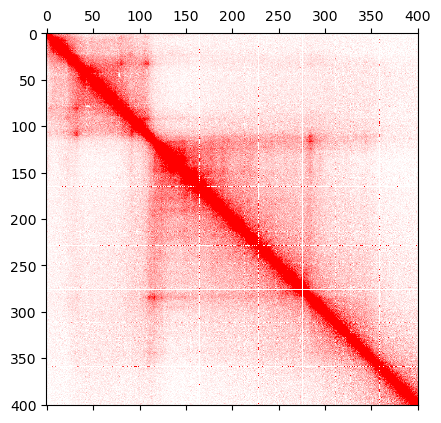

In [7]:
REDMAP = LinearSegmentedColormap.from_list("bright_red", [(1,1,1),(1,0,0)])
# helper function for plotting
def plot_hic_map(dense_matrix, maxcolor):
    plt.matshow(dense_matrix, cmap=REDMAP, vmin=0, vmax=maxcolor)
    plt.show()

plot_hic_map(matrix_npy, 30)

In [34]:
def plot_hic_map2(dense_matrix, vmin, vmax, cmap, ax=None):
    d2 = dense_matrix
    d2[np.isnan(d2)] = 0
    d2[np.isinf(d2)] = 0
    
    if ax:
        img = ax.matshow( d2, cmap=cmap, vmin=vmin, vmax=vmax)
    else:
        img = plt.matshow(d2, cmap=cmap, vmin=vmin, vmax=vmax)
    return img
    #plt.show()

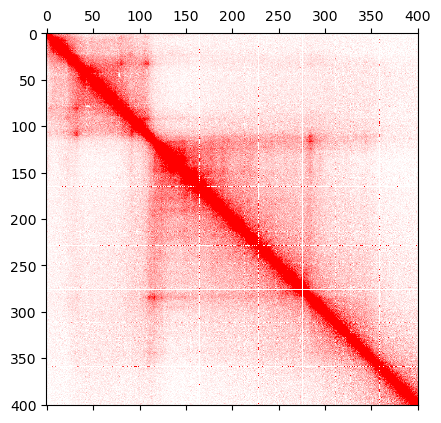

In [27]:
txt_chrom   = "4"
txt_show    = "o"
txt_norm    = "KR" # normalization method
txt_unit    = "BP" # base pairs
num_binsize = 5000 # size of each bin in base pair

matrix_obj  = hic.getMatrixZoomData(txt_chrom, txt_chrom, txt_show, txt_norm, txt_unit, num_binsize)

num_start1 = 10_000_000
num_end1   = 12_000_000
num_start2 = 10_000_000
num_end2   = 12_000_000

matrix_npy = matrix_obj.getRecordsAsMatrix(
    num_start1, num_end1,
    num_start2, num_end2
)

plot_hic_map2(matrix_npy, 0, 30, REDMAP)

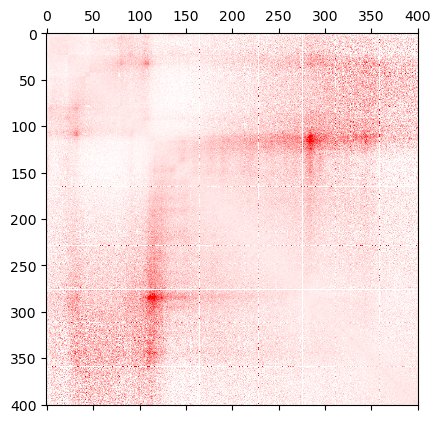

In [28]:
txt_chrom   = "4"
txt_show    = "oe"
txt_norm    = "KR" # normalization method
txt_unit    = "BP" # base pairs
num_binsize = 5000 # size of each bin in base pair

matrix_obj  = hic.getMatrixZoomData(txt_chrom, txt_chrom, txt_show, txt_norm, txt_unit, num_binsize)

num_start1 = 10_000_000
num_end1   = 12_000_000
num_start2 = 10_000_000
num_end2   = 12_000_000

matrix_npy = matrix_obj.getRecordsAsMatrix(
    num_start1, num_end1,
    num_start2, num_end2
)

plot_hic_map2(matrix_npy, 0, 10, REDMAP)

In [55]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

/tmp/ipykernel_53187/3832977589.py:23: RuntimeWarning: divide by zero encountered in log2
  mat = np.log2(matrix_npy)


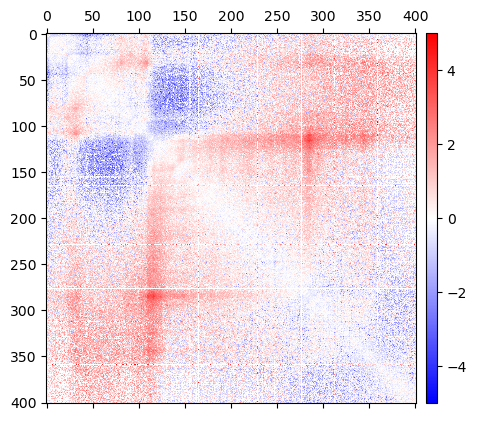

In [64]:
###
txt_chrom   = "4"
txt_show    = "oe"
txt_norm    = "KR" # normalization method
txt_unit    = "BP" # base pairs
num_binsize = 5000 # size of each bin in base pair

matrix_obj  = hic.getMatrixZoomData(txt_chrom, txt_chrom, txt_show, txt_norm, txt_unit, num_binsize)

###
num_start1 = 10_000_000
num_end1   = 12_000_000
num_start2 = 10_000_000
num_end2   = 12_000_000

matrix_npy = matrix_obj.getRecordsAsMatrix(
    num_start1, num_end1,
    num_start2, num_end2
)

### plot heatmap image
fig, ax = plt.subplots(nrows=1, ncols=1)
mat = np.log2(matrix_npy)
img = plot_hic_map2(mat, -5, 5, 'bwr', ax=ax)

### Plot colorbar
### https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(img, cax=cax)

plt.show()

In [73]:
import itertools as it

In [77]:
gen = it.islice('ABCDEFG', None)
lst = list(gen)
lst

['A', 'B', 'C', 'D', 'E', 'F', 'G']